<a href="https://colab.research.google.com/github/vaishnavi59bhure/Practical_Machine_Learning/blob/master/MLday2_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib as plt
import pandas as pd

In [ ]:
dk= pd.read_csv('/content/50_Startups.csv')
dk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RDSpend         48 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  47 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
dk.head()

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
dk['RDSpend'] = dk['RDSpend'].fillna(dk['RDSpend'].mean())
dk['MarketingSpend'] = dk['MarketingSpend'].fillna(dk['MarketingSpend'].mean())
dk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RDSpend         50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
dk['State'].value_counts()

,count
State,
New York,17
California,17
Florida,16


In [ ]:
dk.select_dtypes(include='number').corr()['Profit']         #to find correlaation between all numeric column

,Profit
RDSpend,0.881354
Administration,0.200717
MarketingSpend,0.693088
Profit,1.000000


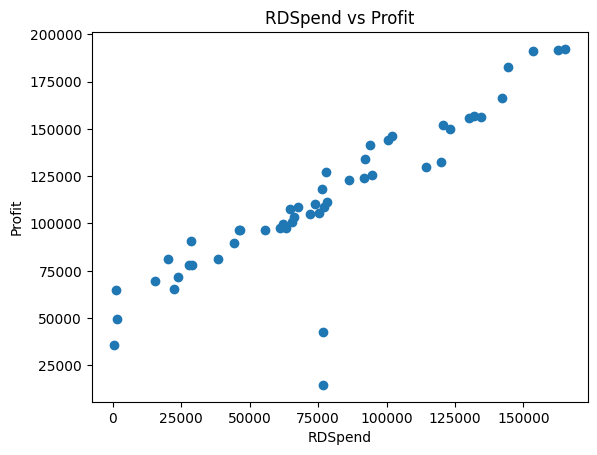

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

#Scatter plot of RDSpend vs Profit
plt.scatter(dk['RDSpend'],dk['Profit'])
plt.xlabel('RDSpend')
plt.ylabel('Profit')
plt.title('RDSpend vs Profit')
plt.show()

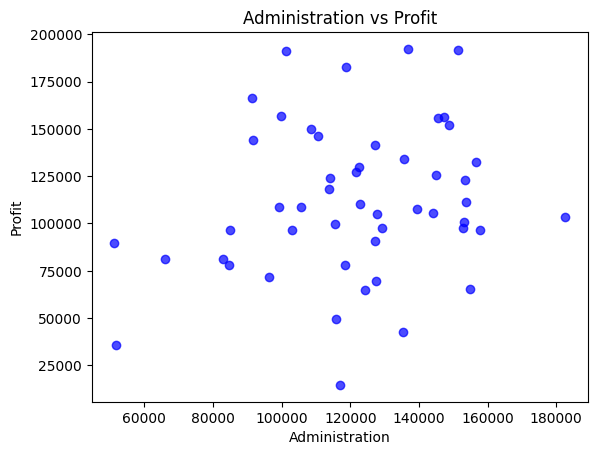

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
plt.scatter(dk['Administration'], dk['Profit'], color='blue', alpha=0.7)
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.title('Administration vs Profit')
plt.show()

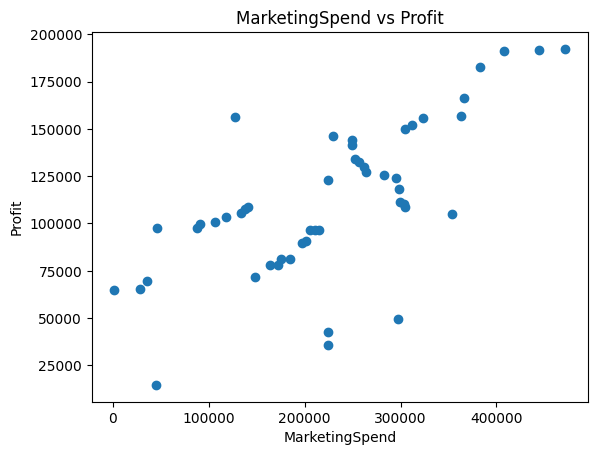

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

#Scatter plot of MarketingSpend vs Profit
plt.scatter(dk['MarketingSpend'],dk['Profit'])
plt.xlabel('MarketingSpend')
plt.ylabel('Profit')
plt.title('MarketingSpend vs Profit')
plt.show()


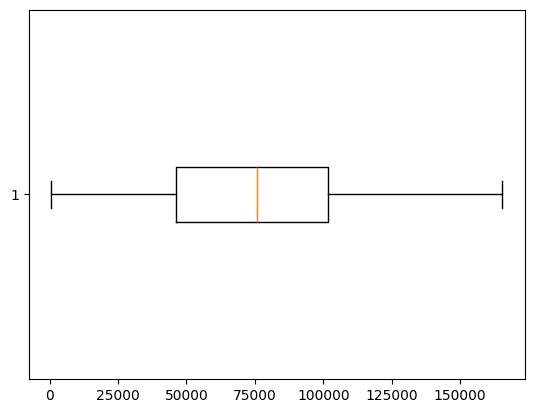

In [ ]:
#check if outliers in independent
plt.boxplot(dk['RDSpend'],vert=False)
plt.show()

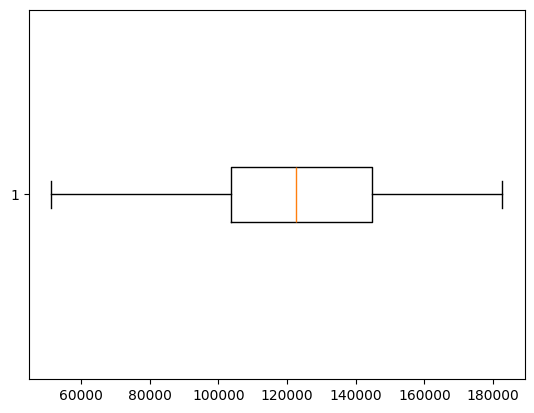

In [ ]:
plt.boxplot(dk['Administration'],vert=False)
plt.show()

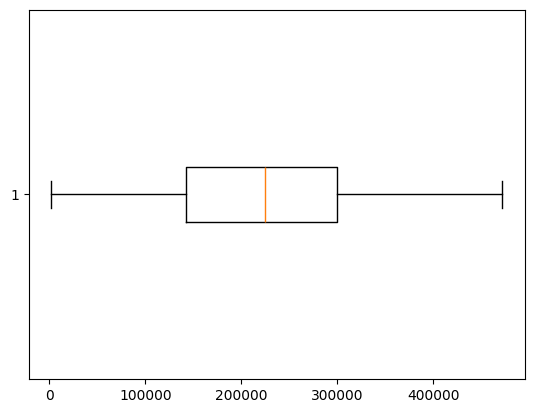

In [ ]:
plt.boxplot(dk['MarketingSpend'],vert=False)
plt.show()

In [ ]:
#write a function to find outliers on upper and lower side. this function takes column as input.
def find_outliers(col):
  q1 = col.quantile(0.25)
  q3 = col.quantile(0.75)
  IQR = q3 - q1
  upperlimit = q3+1.5*IQR
  lowerlimit = q1 -1.5*IQR
  mask_upper = col > upperlimit
  mask_lower = col < lowerlimit
  return len(dk[mask_upper]),len(dk[mask_lower])

  #presence of outlier deviates our average therefor we have to remove it completely

In [ ]:
find_outliers(dk['Administration'])

(0, 0)

In [ ]:
find_outliers(dk['RDSpend'])

(0, 0)

In [ ]:
find_outliers(dk['MarketingSpend'])

(0, 0)

In [ ]:
#how many outliers and also index of row containing outliers

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dk['State'] = le.fit_transform(dk['State'])
dk.head()

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [ ]:
le.inverse_transform([0,1,2])

array(['California', 'Florida', 'New York'], dtype=object)

In [ ]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('ohe',OneHotEncoder(),[3])],remainder='passthrough')
dk = pd.DataFrame(ct.fit_transform(dk))
dk.head()

,0,1,2,3,4,5,6
0,0.0,0.0,1.0,165349.20,136897.80,471784.10,192261.83
1,1.0,0.0,0.0,162597.70,151377.59,443898.53,191792.06
2,0.0,1.0,0.0,153441.51,101145.55,407934.54,191050.39
3,0.0,0.0,1.0,144372.41,118671.85,383199.62,182901.99
4,0.0,1.0,0.0,142107.34,91391.77,366168.42,166187.94


In [ ]:
#decide X and Y
X= dk.iloc[:,:-1]
y= dk.iloc[:,-1]
print(X.shape,y.shape)

(50, 6) (50,)


In [150]:
#split the code in training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)  #no jumbling therefor 1st independent var are assigned then y is calulated

In [151]:
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(40, 5) (10, 5) (40,) (10,)


In [152]:
#Build the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [153]:
yhat = lr.predict(X_test)
print(yhat.shape)

(10,)


In [154]:
print(y_test)
print(yhat.round(2))

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: 6, dtype: float64
[ 97510.54 125117.98 130033.97  74767.17 178155.56 119811.61  72234.12
  93196.85 116298.79 167394.51]


In [155]:
#check accuracy of model
from sklearn.metrics import r2_score
round(r2_score(y_test,yhat),3)

0.907

In [160]:
X1= np.array([0,0,1,100000,150000]).reshape(-1,5)
print(X1.shape)

(1, 5)


In [161]:
lr.predict(X1).round(2)

array([124220.91])

In [149]:
#decide X and Y
X= dk.iloc[:,[0,1,2,3,5]]
y= dk.iloc[:,-1]
print(X.shape,y.shape)

(50, 5) (50,)
